In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-large.csv")
display(df)

,samples,diff
0,1,0.002395
1,2,0.003994
2,3,0.003994
3,4,0.003994
4,5,0.003595
...,...,...
29995,29996,14.831996
29996,29997,14.832795
29997,29998,14.833194
29998,29999,14.833595


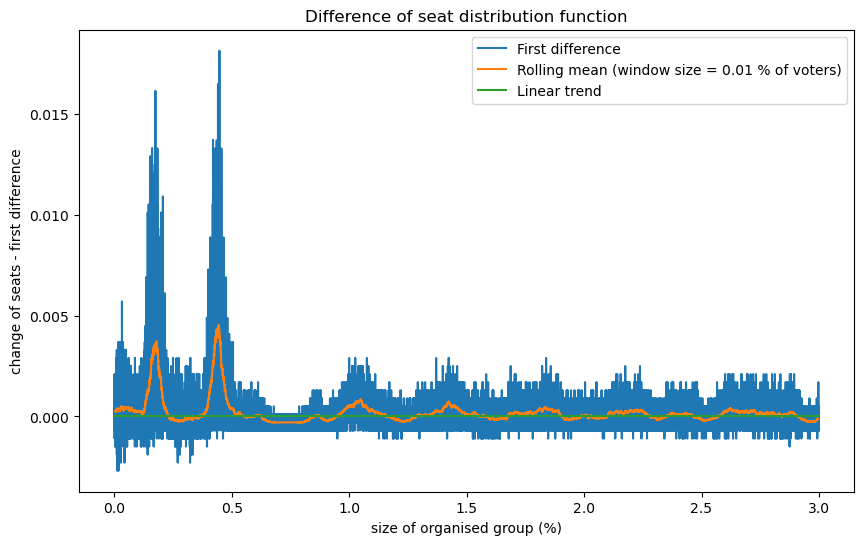

In [3]:
plt.figure(figsize=(10, 6))

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('change of seats - first difference')
plt.title('Difference of seat distribution function')

plt.legend()
plt.show()




In [17]:
max_index = y_rolling.idxmax()
print(max_index)

max_index = y_rolling[:3000].idxmax()
print(max_index)

# top_10_highest = y_rolling.nlargest(10)
# top_10_indices = top_10_highest.index
# top_10_indices


4446
1794
